## Project for the Kaggle competition to explore passenger data from the Titanic disaster aimed at generating a binary classifier to predict survival of individuals.

In [1]:
# importing
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Load data already downloaded from Kaggle and saved into this notebook's folder
titanic_df = pd.read_csv('train.csv')

In [3]:
# Explore the data a bit.
# PassengerId : one based counting of passengers
# Survived : logical if passenger survived disaster
# Pclass : Passenger's class ranging from 1-3, with 1 = the highest (first) class
# Name : recorded name (not going to use but interesting to look at)
# Sex : gender
# Age : age in years
# SibSp : Was the passenger traveling with a sibling
# Parch : "parent/child" was the passenger traveling with a parent or child
# Ticket : recorded ticket number
# Fare : cost of ticket
# Cabin : room number (many of these values are missing from historical records)
# Embark : city the passenger boarded from, S - C - Q

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Some plots to explore who the passengers were on the titanic



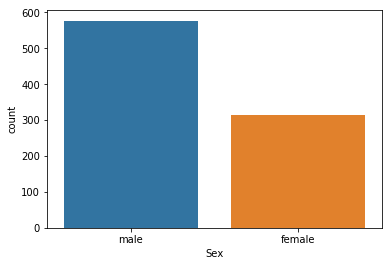

In [6]:
sns.countplot("Sex", data = titanic_df)

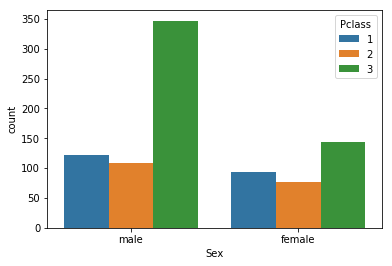

In [7]:
sns.countplot("Sex", data = titanic_df, hue = 'Pclass')

In [8]:
sns.countplot("Pclass", data = titanic_df, hue = "Sex")

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [11]:
titanic_df['person']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7       child
8      female
9       child
10      child
11     female
12       male
13       male
14      child
15     female
16      child
17       male
18     female
19     female
20       male
21       male
22      child
23       male
24      child
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869     child
870      male
871    female
872      male
873      male
874    female
875     child
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: person, Length: 891, dtype: object

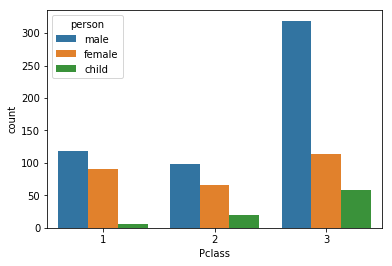

In [12]:
sns.countplot("Pclass", data = titanic_df, hue = "person")

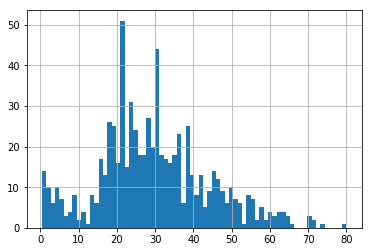

In [13]:
titanic_df['Age'].hist(bins = 70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

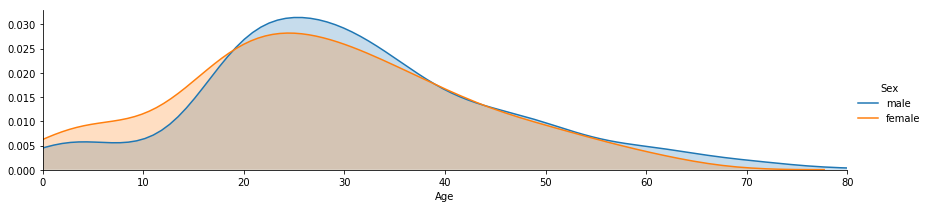

In [16]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

fig.set(xlim = (0, titanic_df['Age'].max()))
fig.add_legend()

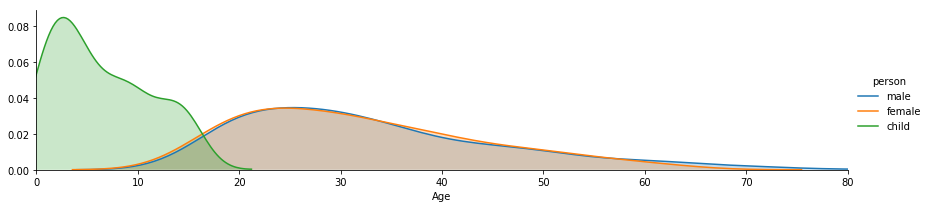

In [17]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

fig.set(xlim = (0, titanic_df['Age'].max()))
fig.add_legend()

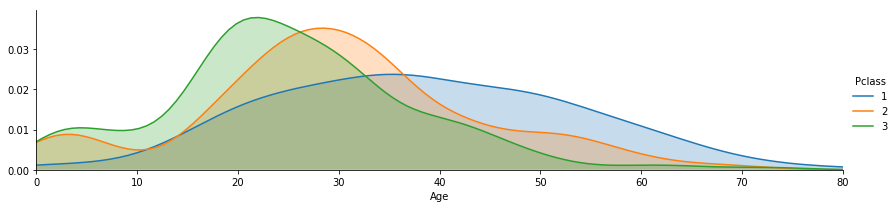

In [18]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

fig.set(xlim = (0, titanic_df['Age'].max()))
fig.add_legend()

# Now to try and understand where people were staying on the titanic relative to their class



In [19]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [20]:
# Note all of the NaN values in the Cabin column.

deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

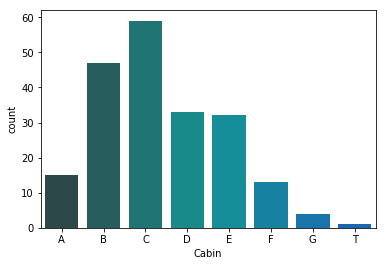

In [22]:
levels = [l[0] for l in deck]

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

order = [l for l in np.unique(cabin_df['Cabin'])]
sns.countplot('Cabin', data = cabin_df, order = order, palette = 'winter_d')

In [23]:
tmp = [True if l[0] == 'T' else False for l in deck]
deck[tmp]

titanic_df['Cabin'][300:350]

300                NaN
301                NaN
302                NaN
303               E101
304                NaN
305            C22 C26
306                NaN
307                C65
308                NaN
309                E36
310                C54
311    B57 B59 B63 B66
312                NaN
313                NaN
314                NaN
315                NaN
316                NaN
317                NaN
318                 C7
319                E34
320                NaN
321                NaN
322                NaN
323                NaN
324                NaN
325                C32
326                NaN
327                  D
328                NaN
329                B18
330                NaN
331               C124
332                C91
333                NaN
334                NaN
335                NaN
336                 C2
337                E40
338                NaN
339                  T
340                 F2
341        C23 C25 C27
342                NaN
343        

In [24]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

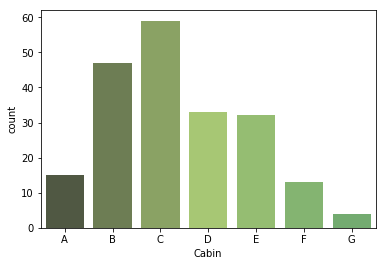

In [25]:
order = [l for l in np.unique(cabin_df['Cabin'])]
sns.countplot('Cabin', data = cabin_df, order = order, palette = 'summer_d')

In [26]:
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['C', 'Q', 'S'])

# Now we can look into if passengers were alone or traveling with family

In [27]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [28]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [29]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\penalab\Anaconda2\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

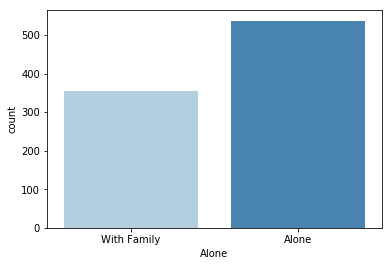

In [31]:
sns.countplot('Alone', data = titanic_df, palette = "Blues")

# Now what factors are related to a passenger's survival chances

In [32]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

sns.countplot('Survivor', data = titanic_df, palette = 'Set1')

In [41]:
sns.catplot(x = 'Pclass', y = 'Survived', data = titanic_df, kind = 'bar')

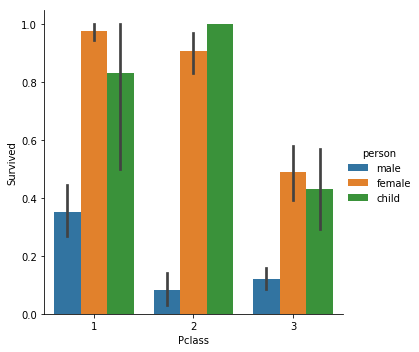

In [42]:
sns.catplot(x = 'Pclass', y = 'Survived', data = titanic_df, hue = 'person', kind = 'bar')

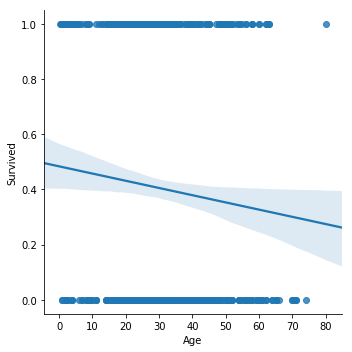

In [43]:
sns.lmplot('Age', 'Survived', data = titanic_df)

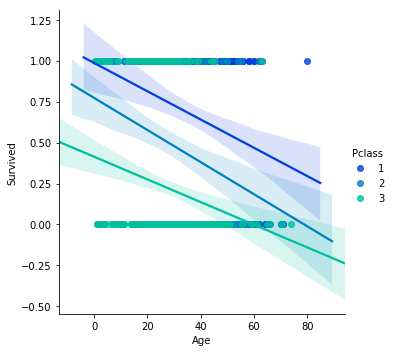

In [46]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass', palette = 'winter')

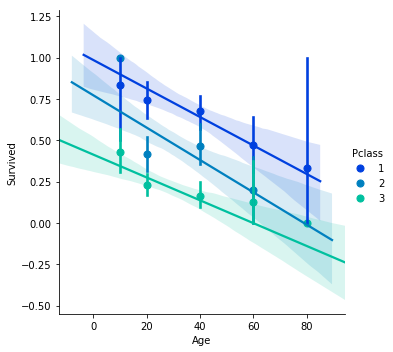

In [47]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations)

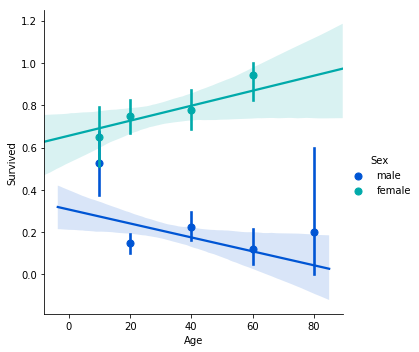

In [48]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)

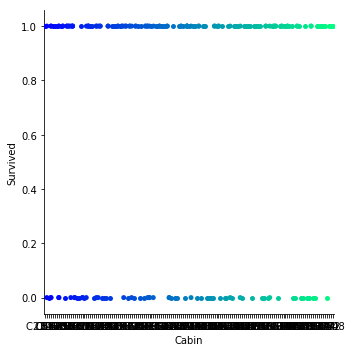

In [50]:
# Munge through the "cabin" column

# First get rid of all NaNs
deck = titanic_df['Cabin'].dropna()
surv = titanic_df['Survived'][deck.index]

# Next we only want to know the deck level, not the particular room number, 
# so just grab the first letter for each value
levels = [l[0] for l in deck]

# Convert to a dataframe
cabin_df = DataFrame([surv, levels])
cabin_df.columns = ['Survived', 'Cabin']

# You will notice with a little exploration we have a strange "T" Value from passenger 339.
# This value must be an error, so we should remove it
cabin_df = cabin_df[cabin_df.Cabin != 'T']

# Then we can plot out the histogram. Making sure things come out in a logical order
order = [l for l in np.unique(cabin_df['Cabin'])]
sns.countplot('Cabin', data = cabin_df, order = order, palette = 'winter_d')

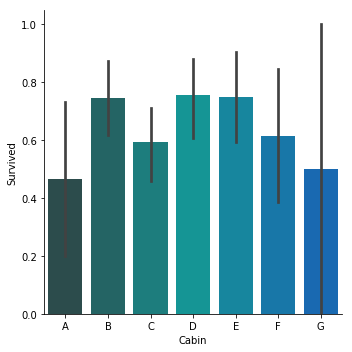

In [66]:
deck = titanic_df['Cabin'].dropna()
surv = titanic_df['Survived'][deck.index]
gend = titanic_df['Sex'][deck.index]

levels = [l[0] for l in deck]

cabin_df = DataFrame({'Survived': surv, 'Cabin':levels, 'Sex':gend})
cabin_df = cabin_df[cabin_df.Cabin != 'T']

order = [l for l in np.unique(cabin_df['Cabin'])]
sns.catplot('Cabin', 'Survived', data = cabin_df, order = order, palette = 'winter_d', kind = 'bar')

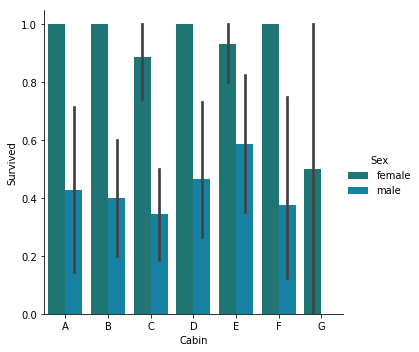

In [67]:
sns.catplot('Cabin', 'Survived', hue = 'Sex', data = cabin_df, order = order, palette = 'winter_d', kind = 'bar')

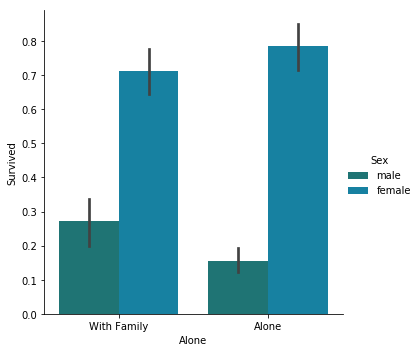

In [68]:
sns.catplot('Alone', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter_d', kind = 'bar')

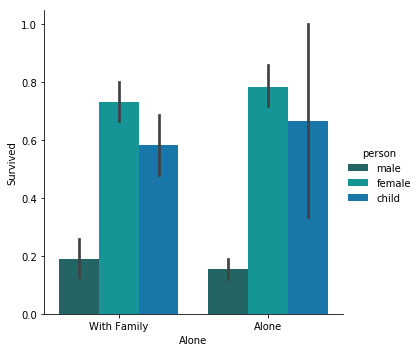

In [70]:
sns.catplot('Alone', 'Survived', hue = 'person', data = titanic_df, palette = 'winter_d', kind = 'bar')

In [72]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  \
0      0         A/5 21171   7.2500   NaN        S    male  With Family   
1      0          PC 17599  71.2833   C85        C  female  With Family   
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone   
3      0            113803  53.1000  C123        S  female  With Family   
4      0            373450   8.0500   NaN        S    male        Alone   

  Survivor  
0       no  
1      yes  
2      yes  
3      yes  
4       no

# Classifier

In [118]:
alone = titanic_df.Alone.map({'With Family': 0, 'Alone': 1})
gender = titanic_df.Sex.map({'male': 0, 'female': 1})

X_train = titanic_df[['Pclass', 'Age', 'Survived']]
X_train['Sex'] = Series(gender)
X_train['Alone'] = Series(alone)
X_train = X_train.dropna()
y_train = X_train['Survived']
X_train = X_train.drop(columns = ['Survived'])

C:\Users\penalab\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\penalab\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [137]:
test = pd.read_csv('test.csv')

test['Alone'] = test.SibSp + test.Parch
alone = []
for l in test.Alone:
    if l == 0:
        alone.append(1)
    else:
        alone.append(0)
alone = Series(alone)
gender = titanic_df.Sex.map({'male': 0, 'female': 1})

X_test = test[['Pclass', 'Age']]
X_test['Sex'] = Series(gender)
X_test['Alone'] = Series(alone)
X_test = X_train.dropna()


C:\Users\penalab\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\penalab\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [139]:
y_test = lda.predict(X_test)